In [ ]:
from google.colab import files

# Upload the CSV files
uploaded = files.upload()

Saving train_payment_data.csv to train_payment_data.csv


In [ ]:
import pandas as pd

# Load the uploaded CSV files into pandas DataFrames
train_payment_data = pd.read_csv('train_payment_data.csv')
train_loan_data = pd.read_csv('train_loan_data.csv')
test_loan_data = pd.read_csv('test_loan_data.csv')

In [ ]:
# code to show the table for pd.read_csv('train_payment_data.csv')


train_payment_data


,loan_id,paid_at,amount,transaction_type
0,834148,2023-11-25 17:44,200000.0,Deposit
1,4028,2019-02-09 16:55,1036300.0,NaN
2,4798,2019-04-25 15:50,1228500.0,NaN
3,2082,2018-08-22 10:41,50000.0,NaN
4,3802,2019-01-05 16:00,1384600.0,NaN
...,...,...,...,...
83270,986564,2024-04-30 14:52,1019500.0,Deposit
83271,988045,2024-04-30 15:48,2980000.0,Deposit
83272,988045,2024-04-30 15:55,1614200.0,Deposit
83273,987393,2024-04-30 16:03,468200.0,Deposit


In [ ]:

print(train_payment_data.shape)


(83275, 4)


In [ ]:
# pd.read_csv('train_loan_data.csv')

train_loan_data

,loan_id,business_id,credit_officer_id,dismissal_description,acquisition_channel,sector,principal,total_owing_at_issue,application_number,applying_for_loan_number,loan_number,employee_count,approval_status,paid_late,total_recovered_on_time,total_recovered_15_dpd,cash_yield_15_dpd
0,860706,604923,131449.0,NaN,Friend,Beauty Fashion,300000.0,345500.0,1,1,1.0,1.0,Approved,False,345500.0,345500.0,45500.0
1,975605,604923,131449.0,NaN,Friend,Beauty Fashion,330000.0,380000.0,2,2,2.0,1.0,Approved,False,380000.0,380000.0,50000.0
2,126416,122438,NaN,Client does not have all of the requirements,Friend,Food Staple Goods,300000.0,NaN,1,1,NaN,1.0,Declined,False,NaN,NaN,NaN
3,127617,122438,108019.0,NaN,Friend,Food Staple Goods,200000.0,221100.0,2,1,1.0,1.0,Approved,False,221100.0,221100.0,21100.0
4,148416,122438,108019.0,NaN,Friend,Food Staple Goods,220000.0,243200.0,3,2,2.0,1.0,Approved,False,243200.0,243200.0,23200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25097,657238,465661,NaN,NaN,Friend,Beauty Fashion,230000.0,NaN,1,1,NaN,1.0,Expired,False,NaN,NaN,NaN
25098,916930,465661,370986.0,NaN,Friend,Beauty Fashion,230000.0,NaN,2,1,NaN,1.0,Cancelled,False,NaN,NaN,NaN
25099,922287,465661,175606.0,NaN,Friend,Beauty Fashion,230000.0,271900.0,3,1,1.0,1.0,Approved,False,271900.0,271900.0,41900.0
25100,934793,465661,175606.0,NaN,Friend,Beauty Fashion,238900.0,267900.0,4,2,2.0,1.0,Approved,True,0.0,267900.0,29000.0


In [ ]:

print(train_loan_data.shape)


(25102, 17)


In [ ]:
#code to show the data types


print(train_loan_data.dtypes)


loan_id                       int64
business_id                   int64
credit_officer_id           float64
dismissal_description        object
acquisition_channel          object
sector                       object
principal                   float64
total_owing_at_issue        float64
application_number            int64
applying_for_loan_number      int64
loan_number                 float64
employee_count              float64
approval_status              object
paid_late                      bool
total_recovered_on_time     float64
total_recovered_15_dpd      float64
cash_yield_15_dpd           float64
dtype: object


In [ ]:
print(train_payment_data.dtypes)

loan_id               int64
paid_at              object
amount              float64
transaction_type     object
dtype: object


In [ ]:
# code to check for ,missing number


print(train_loan_data.isnull().sum())


loan_id                         0
business_id                     0
credit_officer_id             472
dismissal_description       24548
acquisition_channel             0
sector                          0
principal                       0
total_owing_at_issue         1164
application_number              0
applying_for_loan_number        0
loan_number                  1164
employee_count                856
approval_status                 0
paid_late                       0
total_recovered_on_time      1164
total_recovered_15_dpd       1164
cash_yield_15_dpd            1164
dtype: int64


In [ ]:
print(train_payment_data.isnull().sum())

loan_id                0
paid_at                0
amount                 0
transaction_type    3322
dtype: int64


**Data Cleaning and Pre-processing**

In [ ]:


# Create a copy of the original DataFrames to avoid modifying them directly
train_loan_data_cleaned = train_loan_data.copy()
train_payment_data_cleaned = train_payment_data.copy()

# Remove columns with string data in train_payment_data_cleaned
for column in train_payment_data_cleaned.columns:
  if train_payment_data_cleaned[column].dtype == object:
    train_payment_data_cleaned = train_payment_data_cleaned.drop(column, axis=1)

# Remove columns with string data in train_loan_data_cleaned, excluding categorical columns
categorical_columns = ['paid_late']  # Replace with your actual categorical columns

for column in train_loan_data_cleaned.columns:
  if train_loan_data_cleaned[column].dtype == object and column not in categorical_columns:
    train_loan_data_cleaned = train_loan_data_cleaned.drop(column, axis=1)


# Now train_loan_data_cleaned and train_payment_data_cleaned contain only numerical data
# (excluding specified categorical columns in train_loan_data_cleaned).


In [ ]:
train_loan_data_cleaned

,loan_id,business_id,credit_officer_id,principal,total_owing_at_issue,application_number,applying_for_loan_number,loan_number,employee_count,paid_late,total_recovered_on_time,total_recovered_15_dpd,cash_yield_15_dpd
0,860706,604923,131449.0,300000.0,345500.0,1,1,1.0,1.0,False,345500.0,345500.0,45500.0
1,975605,604923,131449.0,330000.0,380000.0,2,2,2.0,1.0,False,380000.0,380000.0,50000.0
2,126416,122438,NaN,300000.0,NaN,1,1,NaN,1.0,False,NaN,NaN,NaN
3,127617,122438,108019.0,200000.0,221100.0,2,1,1.0,1.0,False,221100.0,221100.0,21100.0
4,148416,122438,108019.0,220000.0,243200.0,3,2,2.0,1.0,False,243200.0,243200.0,23200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25097,657238,465661,NaN,230000.0,NaN,1,1,NaN,1.0,False,NaN,NaN,NaN
25098,916930,465661,370986.0,230000.0,NaN,2,1,NaN,1.0,False,NaN,NaN,NaN
25099,922287,465661,175606.0,230000.0,271900.0,3,1,1.0,1.0,False,271900.0,271900.0,41900.0
25100,934793,465661,175606.0,238900.0,267900.0,4,2,2.0,1.0,True,0.0,267900.0,29000.0


In [ ]:
train_payment_data_cleaned

,loan_id,amount
0,834148,200000.0
1,4028,1036300.0
2,4798,1228500.0
3,2082,50000.0
4,3802,1384600.0
...,...,...
83270,986564,1019500.0
83271,988045,2980000.0
83272,988045,1614200.0
83273,987393,468200.0


In [ ]:


# Replace missing values in train_loan_data_cleaned with the mean
for column in train_loan_data_cleaned.columns:
    if train_loan_data_cleaned[column].isnull().any():
        train_loan_data_cleaned[column].fillna(train_loan_data_cleaned[column].mean(), inplace=True)

# Replace missing values in train_payment_data_cleaned with the mean
for column in train_payment_data_cleaned.columns:
    if train_payment_data_cleaned[column].isnull().any():
        train_payment_data_cleaned[column].fillna(train_payment_data_cleaned[column].mean(), inplace=True)

print(train_loan_data_cleaned.isnull().sum())
print(train_payment_data_cleaned.isnull().sum())


loan_id                     0
business_id                 0
credit_officer_id           0
principal                   0
total_owing_at_issue        0
application_number          0
applying_for_loan_number    0
loan_number                 0
employee_count              0
paid_late                   0
total_recovered_on_time     0
total_recovered_15_dpd      0
cash_yield_15_dpd           0
dtype: int64
loan_id    0
amount     0
dtype: int64


<ipython-input-16-91d40064d928>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_loan_data_cleaned[column].fillna(train_loan_data_cleaned[column].mean(), inplace=True)


In [ ]:
train_loan_data_cleaned

,loan_id,business_id,credit_officer_id,principal,total_owing_at_issue,application_number,applying_for_loan_number,loan_number,employee_count,paid_late,total_recovered_on_time,total_recovered_15_dpd,cash_yield_15_dpd
0,860706,604923,131449.000000,300000.0,345500.000000,1,1,1.00000,1.0,False,345500.000000,345500.000000,45500.000000
1,975605,604923,131449.000000,330000.0,380000.000000,2,2,2.00000,1.0,False,380000.000000,380000.000000,50000.000000
2,126416,122438,191067.506212,300000.0,845900.104645,1,1,10.11346,1.0,False,829156.622107,845241.517253,94693.647548
3,127617,122438,108019.000000,200000.0,221100.000000,2,1,1.00000,1.0,False,221100.000000,221100.000000,21100.000000
4,148416,122438,108019.000000,220000.0,243200.000000,3,2,2.00000,1.0,False,243200.000000,243200.000000,23200.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25097,657238,465661,191067.506212,230000.0,845900.104645,1,1,10.11346,1.0,False,829156.622107,845241.517253,94693.647548
25098,916930,465661,370986.000000,230000.0,845900.104645,2,1,10.11346,1.0,False,829156.622107,845241.517253,94693.647548
25099,922287,465661,175606.000000,230000.0,271900.000000,3,1,1.00000,1.0,False,271900.000000,271900.000000,41900.000000
25100,934793,465661,175606.000000,238900.0,267900.000000,4,2,2.00000,1.0,True,0.000000,267900.000000,29000.000000


In [ ]:
train_payment_data_cleaned

,loan_id,amount
0,834148,200000.0
1,4028,1036300.0
2,4798,1228500.0
3,2082,50000.0
4,3802,1384600.0
...,...,...
83270,986564,1019500.0
83271,988045,2980000.0
83272,988045,1614200.0
83273,987393,468200.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assume train_loan_data_cleaned is your DataFrame containing the 'paid_late' column
label_encoder = LabelEncoder()
train_loan_data_cleaned['paid_late'] = label_encoder.fit_transform(train_loan_data_cleaned['paid_late'])


In [ ]:
train_loan_data_cleaned

,loan_id,business_id,credit_officer_id,principal,total_owing_at_issue,application_number,applying_for_loan_number,loan_number,employee_count,paid_late,total_recovered_on_time,total_recovered_15_dpd,cash_yield_15_dpd
0,860706,604923,131449.000000,300000.0,345500.000000,1,1,1.00000,1.0,0,345500.000000,345500.000000,45500.000000
1,975605,604923,131449.000000,330000.0,380000.000000,2,2,2.00000,1.0,0,380000.000000,380000.000000,50000.000000
2,126416,122438,191067.506212,300000.0,845900.104645,1,1,10.11346,1.0,0,829156.622107,845241.517253,94693.647548
3,127617,122438,108019.000000,200000.0,221100.000000,2,1,1.00000,1.0,0,221100.000000,221100.000000,21100.000000
4,148416,122438,108019.000000,220000.0,243200.000000,3,2,2.00000,1.0,0,243200.000000,243200.000000,23200.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25097,657238,465661,191067.506212,230000.0,845900.104645,1,1,10.11346,1.0,0,829156.622107,845241.517253,94693.647548
25098,916930,465661,370986.000000,230000.0,845900.104645,2,1,10.11346,1.0,0,829156.622107,845241.517253,94693.647548
25099,922287,465661,175606.000000,230000.0,271900.000000,3,1,1.00000,1.0,0,271900.000000,271900.000000,41900.000000
25100,934793,465661,175606.000000,238900.0,267900.000000,4,2,2.00000,1.0,1,0.000000,267900.000000,29000.000000


**saving the cleaned data into CSV file**

In [ ]:


train_loan_data_cleaned.to_csv('train_loan_data_cleaned.csv', index=False)


In [ ]:


train_payment_data_cleaned.to_csv('train_payment_data_cleaned.csv', index=False)


**Merging the train_payment_data and train_loan_data on loan_id to create a unified dataset for training machine learning models**
- we can combine them based on the loan_id column, which is the common identifier in both datasets.

In [ ]:
import pandas as pd

# Load datasets
train_loan_data_cleaned = pd.read_csv('train_loan_data_cleaned.csv')
train_payment_data_cleaned = pd.read_csv('train_payment_data_cleaned.csv')

# Aggregate payment data if necessary (e.g., sum of payments per loan_id)
payment_agg = train_payment_data_cleaned.groupby('loan_id').agg({
    'amount': ['sum', 'count']  # Sum of total payments and count of payments
}).reset_index()

# Rename columns after aggregation
payment_agg.columns = ['loan_id', 'total_paid', 'payment_count']

# Merge the aggregated payment data with the loan data on loan_id
merged_data = pd.merge(train_loan_data_cleaned, payment_agg, on='loan_id', how='left')

# Fill missing values (if a loan_id has no payment records, we fill with 0)
merged_data.fillna(0, inplace=True)

# Inspect the merged data
print(merged_data.head())

# After this, you can use merged_data for further preprocessing (like encoding, scaling, etc.) before applying it to a machine learning model



   loan_id  business_id  credit_officer_id  principal  total_owing_at_issue  \
0   860706       604923      131449.000000   300000.0         345500.000000   
1   975605       604923      131449.000000   330000.0         380000.000000   
2   126416       122438      191067.506212   300000.0         845900.104645   
3   127617       122438      108019.000000   200000.0         221100.000000   
4   148416       122438      108019.000000   220000.0         243200.000000   

   application_number  applying_for_loan_number  loan_number  employee_count  \
0                   1                         1      1.00000             1.0   
1                   2                         2      2.00000             1.0   
2                   1                         1     10.11346             1.0   
3                   2                         1      1.00000             1.0   
4                   3                         2      2.00000             1.0   

   paid_late  total_recovered_on_time  total

In [ ]:
merged_data

,loan_id,business_id,credit_officer_id,principal,total_owing_at_issue,application_number,applying_for_loan_number,loan_number,employee_count,paid_late,total_recovered_on_time,total_recovered_15_dpd,cash_yield_15_dpd,total_paid,payment_count
0,860706,604923,131449.000000,300000.0,345500.000000,1,1,1.00000,1.0,0,345500.000000,345500.000000,45500.000000,345500.0,2.0
1,975605,604923,131449.000000,330000.0,380000.000000,2,2,2.00000,1.0,0,380000.000000,380000.000000,50000.000000,380000.0,2.0
2,126416,122438,191067.506212,300000.0,845900.104645,1,1,10.11346,1.0,0,829156.622107,845241.517253,94693.647548,0.0,0.0
3,127617,122438,108019.000000,200000.0,221100.000000,2,1,1.00000,1.0,0,221100.000000,221100.000000,21100.000000,221100.0,1.0
4,148416,122438,108019.000000,220000.0,243200.000000,3,2,2.00000,1.0,0,243200.000000,243200.000000,23200.000000,243200.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25097,657238,465661,191067.506212,230000.0,845900.104645,1,1,10.11346,1.0,0,829156.622107,845241.517253,94693.647548,0.0,0.0
25098,916930,465661,370986.000000,230000.0,845900.104645,2,1,10.11346,1.0,0,829156.622107,845241.517253,94693.647548,0.0,0.0
25099,922287,465661,175606.000000,230000.0,271900.000000,3,1,1.00000,1.0,0,271900.000000,271900.000000,41900.000000,271900.0,1.0
25100,934793,465661,175606.000000,238900.0,267900.000000,4,2,2.00000,1.0,1,0.000000,267900.000000,29000.000000,274900.0,2.0


            loan_id    business_id  credit_officer_id     principal  \
count  2.510200e+04   25102.000000       25102.000000  2.510200e+04   
mean   6.793551e+05  288175.080153      191067.506212  7.374248e+05   
std    2.450577e+05  176528.747482      106939.355230  8.178131e+05   
min    6.190000e+02    2055.000000        5875.000000  1.500000e+04   
25%    5.280155e+05  141785.000000      108022.000000  3.000000e+05   
50%    7.363610e+05  278860.500000      175606.000000  4.917000e+05   
75%    8.859150e+05  424267.000000      279289.000000  8.299000e+05   
max    1.009205e+06  708308.000000      730701.000000  1.200000e+07   

       total_owing_at_issue  application_number  applying_for_loan_number  \
count          2.510200e+04        25102.000000              25102.000000   
mean           8.459001e+05           10.363875                  9.851725   
std            9.085764e+05            8.051744                  7.881200   
min            1.670000e+04            1.000000     

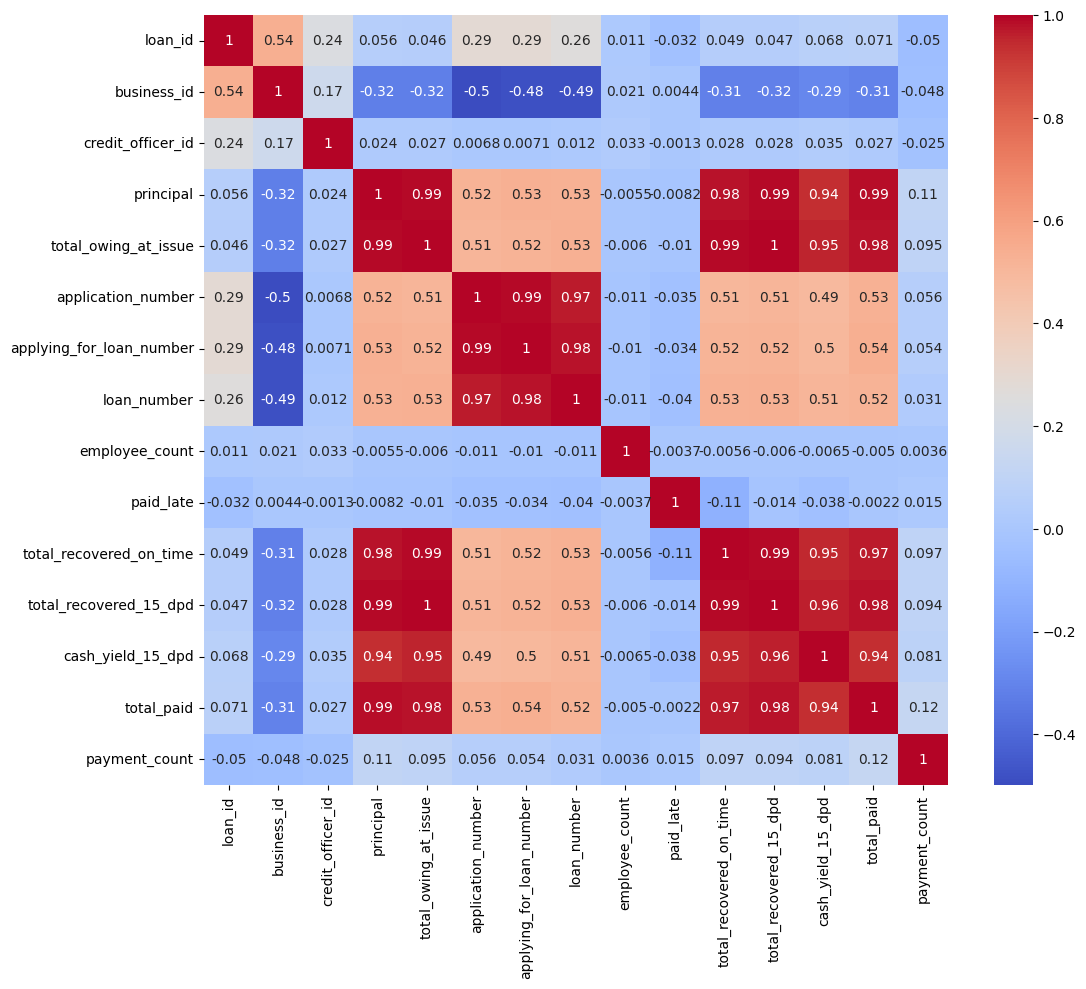

In [ ]:


# Check for basic statistics of numerical features
print(merged_data.describe())

# Check for unique values in categorical features (if any)
for column in merged_data.columns:
  if merged_data[column].dtype == object:
    print(f"Unique values in {column}: {merged_data[column].unique()}")

# Check for correlations between features
correlation_matrix = merged_data.corr()
print(correlation_matrix)

# You can also visualize the correlation matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()




In [ ]:

print(train_payment_data_cleaned.dtypes)


loan_id      int64
amount     float64
dtype: object


In [ ]:


print(train_payment_data_cleaned.shape)


(83275, 2)


In [ ]:

print(train_loan_data_cleaned.dtypes)


loan_id                       int64
business_id                   int64
credit_officer_id           float64
principal                   float64
total_owing_at_issue        float64
application_number            int64
applying_for_loan_number      int64
loan_number                 float64
employee_count              float64
paid_late                     int64
total_recovered_on_time     float64
total_recovered_15_dpd      float64
cash_yield_15_dpd           float64
dtype: object


In [ ]:
print(train_loan_data_cleaned.shape)

(25102, 13)


In [ ]:


print(merged_data.dtypes)


loan_id                       int64
business_id                   int64
credit_officer_id           float64
principal                   float64
total_owing_at_issue        float64
application_number            int64
applying_for_loan_number      int64
loan_number                 float64
employee_count              float64
paid_late                     int64
total_recovered_on_time     float64
total_recovered_15_dpd      float64
cash_yield_15_dpd           float64
total_paid                  float64
payment_count               float64
dtype: object


In [ ]:
#to check the number of columns or features added to train_loan_data_cleaned from the payment

num_features_added = len(merged_data.columns) - len(train_loan_data_cleaned.columns)
print(f"Number of features added from payment data: {num_features_added}")


Number of features added from payment data: 2


to check the name of features addeded to the merged data of

**generate the name of the features added train_loan_data_cleaned**

In [ ]:

added_features = [col for col in merged_data.columns if col not in train_loan_data_cleaned.columns]

print("Features added from payment data:", added_features)


Features added from payment data: ['total_paid', 'payment_count']


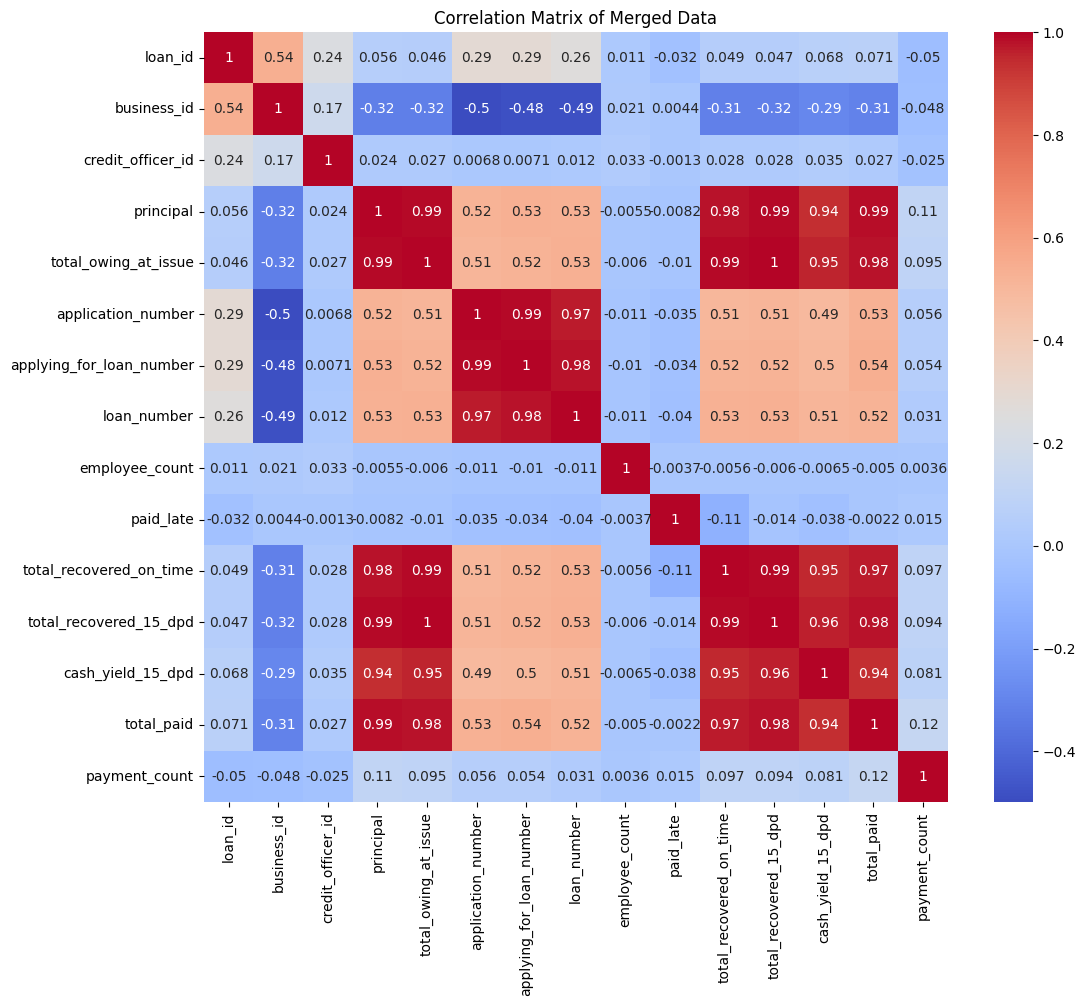

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Merged Data')
plt.show()


In [ ]:
merged_data.to_csv('merged_data.csv', index=False)

In [ ]:
#code to chek for the dimmesnion of the above data

print("Dimensions of merged_data:")
print(merged_data.shape)


Dimensions of merged_data:
(25102, 15)


In [ ]:
import pandas as pd

# Load your dataset (assuming it has already been cleaned and merged)
df = pd.read_csv('merged_data.csv')

# List of columns to drop
columns_to_remove = ['loan_id', 'business_id', 'credit_officer_id', 'application_number',
                     'applying_for_loan_number', 'loan_number']

# Drop the unnecessary columns
df_cleaned = df.drop(columns=columns_to_remove)

# Preview the cleaned dataset
print(df_cleaned.head())

# Check for any missing values (Optional)
print(df_cleaned.isnull().sum())

# Optionally, fill missing values (if necessary)
df_cleaned.fillna(0, inplace=True)

# Final cleaned dataset ready for further analysis or model preparation
print(df_cleaned.shape)


   principal  total_owing_at_issue  employee_count  paid_late  \
0   300000.0         345500.000000             1.0          0   
1   330000.0         380000.000000             1.0          0   
2   300000.0         845900.104645             1.0          0   
3   200000.0         221100.000000             1.0          0   
4   220000.0         243200.000000             1.0          0   

   total_recovered_on_time  total_recovered_15_dpd  cash_yield_15_dpd  \
0            345500.000000           345500.000000       45500.000000   
1            380000.000000           380000.000000       50000.000000   
2            829156.622107           845241.517253       94693.647548   
3            221100.000000           221100.000000       21100.000000   
4            243200.000000           243200.000000       23200.000000   

   total_paid  payment_count  
0    345500.0            2.0  
1    380000.0            2.0  
2         0.0            0.0  
3    221100.0            1.0  
4    243200.0  

In [ ]:
df_cleaned

,principal,total_owing_at_issue,employee_count,paid_late,total_recovered_on_time,total_recovered_15_dpd,cash_yield_15_dpd,total_paid,payment_count
0,300000.0,345500.000000,1.0,0,345500.000000,345500.000000,45500.000000,345500.0,2.0
1,330000.0,380000.000000,1.0,0,380000.000000,380000.000000,50000.000000,380000.0,2.0
2,300000.0,845900.104645,1.0,0,829156.622107,845241.517253,94693.647548,0.0,0.0
3,200000.0,221100.000000,1.0,0,221100.000000,221100.000000,21100.000000,221100.0,1.0
4,220000.0,243200.000000,1.0,0,243200.000000,243200.000000,23200.000000,243200.0,1.0
...,...,...,...,...,...,...,...,...,...
25097,230000.0,845900.104645,1.0,0,829156.622107,845241.517253,94693.647548,0.0,0.0
25098,230000.0,845900.104645,1.0,0,829156.622107,845241.517253,94693.647548,0.0,0.0
25099,230000.0,271900.000000,1.0,0,271900.000000,271900.000000,41900.000000,271900.0,1.0
25100,238900.0,267900.000000,1.0,1,0.000000,267900.000000,29000.000000,274900.0,2.0


In [ ]:


print(df_cleaned.shape)


(25102, 9)


In [ ]:
# Save the cleaned data for ML to a CSV file
df_cleaned.to_csv('data_for_ml.csv', index=False)

print("Cleaned data saved to 'data_for_ml.csv'")


Cleaned data saved to 'data_for_ml.csv'


**Machine Learning Prediction**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the cleaned data
df_cleaned = pd.read_csv('data_for_ml.csv')

# Separate features and target
X = df_cleaned.drop(columns=['paid_late'])  # Features
y = df_cleaned['paid_late']  # Target

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the feature data
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add the target variable back to the scaled DataFrame
df_normalized = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

# Save the normalized data to CSV
df_normalized.to_csv('normalized_data_for_ml.csv', index=False)

print("Normalized data saved to 'normalized_data_for_ml.csv'")


Normalized data saved to 'normalized_data_for_ml.csv'


Training Accuracy: 100.00%
Validation Accuracy: 99.72%
Confusion Matrix:
[[4896    0]
 [  14  111]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4896
           1       1.00      0.89      0.94       125

    accuracy                           1.00      5021
   macro avg       1.00      0.94      0.97      5021
weighted avg       1.00      1.00      1.00      5021



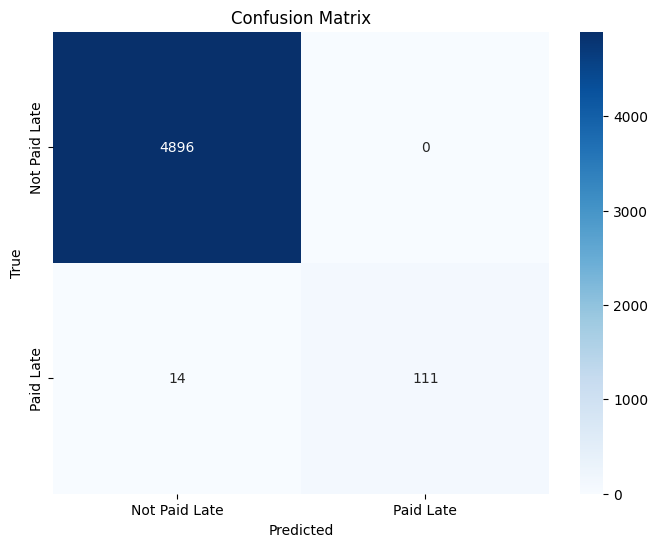

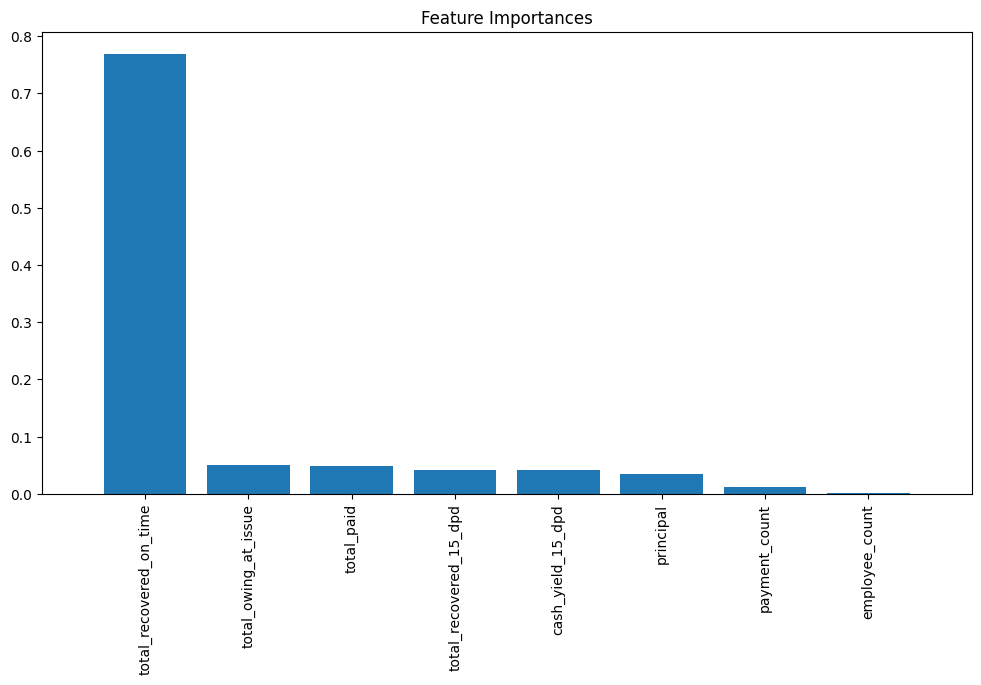

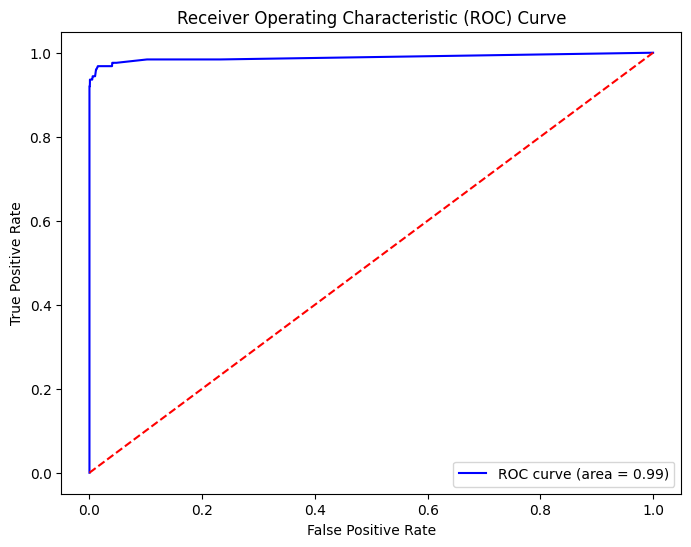

['loan_default_prediction_model.pkl']

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Load the cleaned data
df_normalized = pd.read_csv('normalized_data_for_ml.csv')

# Encode the target variable if necessary (assuming 'paid_late' is categorical)
label_encoder = LabelEncoder()
df_normalized['paid_late'] = label_encoder.fit_transform(df_normalized['paid_late'])

# Separate features and target
X = df_normalized.drop(columns=['paid_late'])  # Features
y = df_normalized['paid_late']  # Target

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the validation set
y_val_pred = model.predict(X_val)
y_val_pred_proba = model.predict_proba(X_val)[:, 1]  # Probability for the positive class

# Evaluate the model for training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model for validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

# Print out the accuracies
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Paid Late', 'Paid Late'], yticklabels=['Not Paid Late', 'Paid Late'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plotting feature importances
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Save the trained model to be used later
import joblib
joblib.dump(model, 'loan_default_prediction_model.pkl')


In [ ]:
# prompt: explain what the confusion matrix did above

# The confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.
# It allows visualization of the performance of an algorithm.
# It displays the number of correct and incorrect predictions broken down by each class.
# The confusion matrix in the above code was created to evaluate the performance of the Random Forest Classifier on the validation set.


# In the context of the code provided:
#   - True Positives (TP): The model correctly predicted that a loan would be paid late (paid_late = 1).
#   - True Negatives (TN): The model correctly predicted that a loan would not be paid late (paid_late = 0).
#   - False Positives (FP): The model incorrectly predicted that a loan would be paid late when it actually was not (paid_late = 0). Also known as a Type I error.
#   - False Negatives (FN): The model incorrectly predicted that a loan would not be paid late when it actually was (paid_late = 1). Also known as a Type II error.


# The confusion matrix is useful for understanding the different types of errors that the model is making.
# For example, a high number of false positives might mean that the model is too sensitive and is predicting paid_late too often when it is not really the case.
# On the other hand, a high number of false negatives might indicate that the model is not sensitive enough and is missing instances of loans that are likely to be paid late.

# By analyzing the confusion matrix, you can identify areas where the model needs to be improved.


Cross-Validation Scores:
[0.99721171 0.99701255 0.99482072 0.99641434 0.99760956]
Mean Accuracy: 99.66%
Standard Deviation: 0.10%
Accuracy: 100.00%
Confusion Matrix:
[[24407     0]
 [    1   694]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24407
           1       1.00      1.00      1.00       695

    accuracy                           1.00     25102
   macro avg       1.00      1.00      1.00     25102
weighted avg       1.00      1.00      1.00     25102



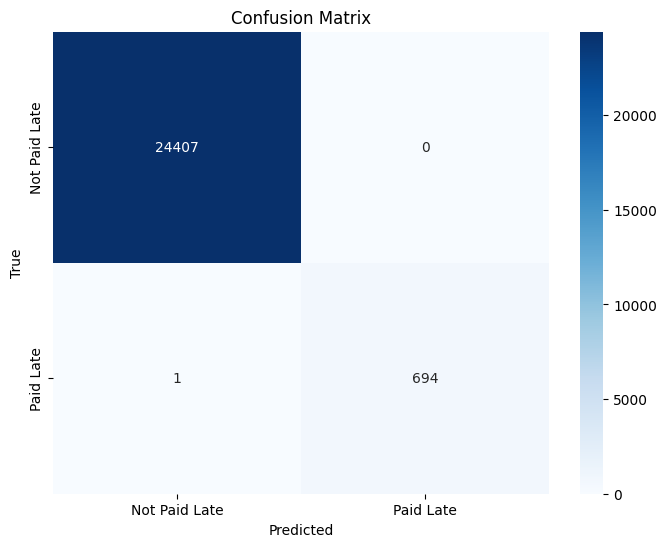

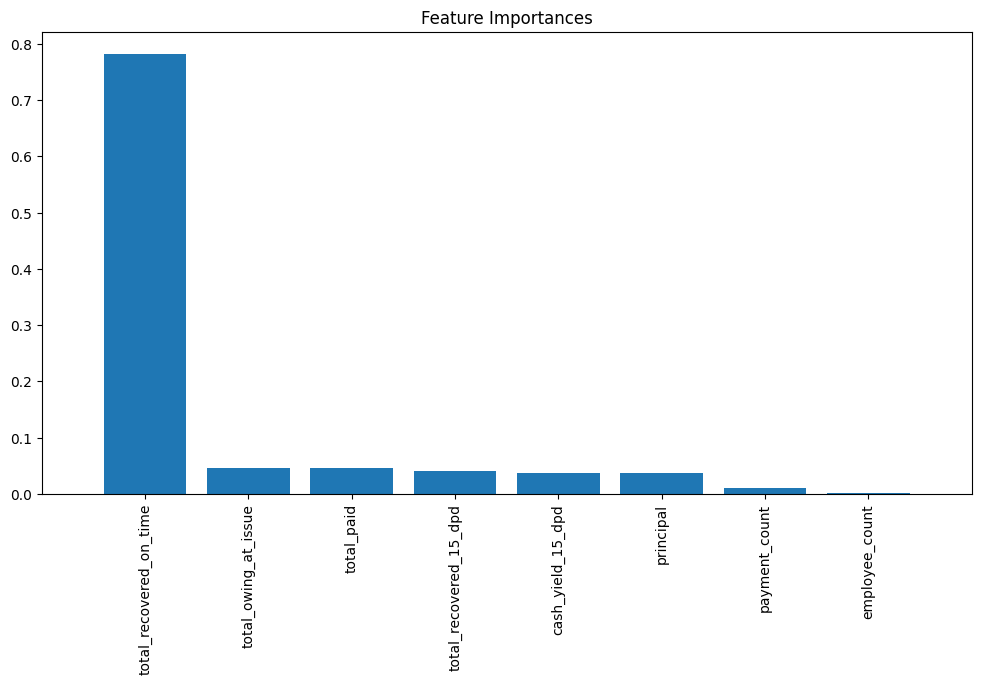

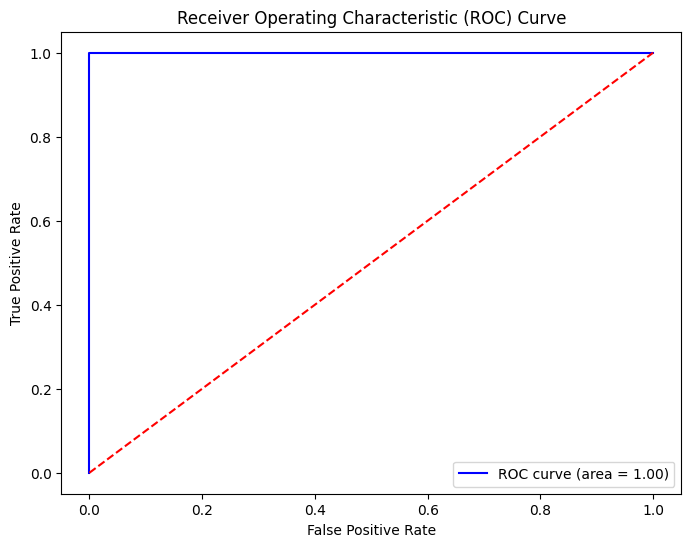

['loan_default_prediction_model1.pkl']

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Load the cleaned data
df_normalized = pd.read_csv('normalized_data_for_ml.csv')

# Encode the target variable if necessary (assuming 'paid_late' is categorical)
label_encoder = LabelEncoder()
df_normalized['paid_late'] = label_encoder.fit_transform(df_normalized['paid_late'])

# Separate features and target
X = df_normalized.drop(columns=['paid_late'])  # Features
y = df_normalized['paid_late']  # Target

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation (e.g., 5 folds)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)
print(f"Mean Accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard Deviation: {cv_scores.std() * 100:.2f}%")

# Optionally fit the model on the entire dataset after cross-validation
model.fit(X, y)

# Predict on the validation set
y_pred = model.predict(X)

# Calculate the predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X)[:, 1]  # Probability for the positive class

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Paid Late', 'Paid Late'],
            yticklabels=['Not Paid Late', 'Paid Late'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plotting feature importances
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Save the trained model to be used later
import joblib
joblib.dump(model, 'loan_default_prediction_model1.pkl')


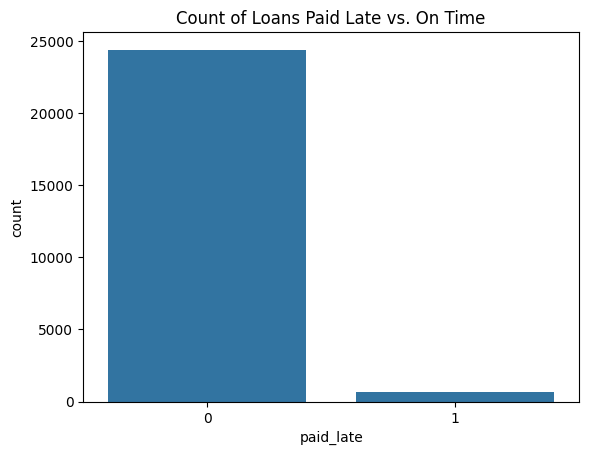

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='paid_late', data=merged_data)
plt.title('Count of Loans Paid Late vs. On Time')
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.exceptions import ConvergenceWarning
import warnings

# Load your dataset
df_normalized = pd.read_csv('normalized_data_for_ml.csv')

# Separate features and target
X = df_normalized.drop(columns=['paid_late'])
y = df_normalized['paid_late']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model and success flag
model = RandomForestClassifier(n_estimators=100, random_state=42)
success = False
max_retries = 5  # Maximum retries before stopping
retries = 0      # Initialize retry counter

# Suppress convergence warnings for demonstration purposes
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define the training loop with hyperparameter adjustment and convergence check
while not success and retries < max_retries:
    try:
        # Train the model
        model.fit(X_train, y_train)
        success = True
    except ConvergenceWarning as e:
        print("Convergence warning occurred:", e)
        # Adjust hyperparameters (for example, increasing the number of trees)
        model.set_params(n_estimators=model.n_estimators + 50)
        retries += 1

    # Check if the model overfits (simple check using training vs test accuracy)
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    if train_accuracy > 0.99 and test_accuracy < 0.7:
        print("Model overfitting detected. Stopping training.")
        break

# If training was successful, make predictions
if success:
    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
else:
    print("Training was not successful after multiple attempts.")



Test Accuracy: 99.72%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4896
           1       1.00      0.89      0.94       125

    accuracy                           1.00      5021
   macro avg       1.00      0.94      0.97      5021
weighted avg       1.00      1.00      1.00      5021



**Explanation**:
- Training Loop: The model is trained in a loop. If a ConvergenceWarning is raised, it retries the training with adjusted hyperparameters (increasing the number of trees in RandomForestClassifier as an example).

- Overfitting Check: A simple check for overfitting is added. If training accuracy is extremely high (greater than 99%), but testing accuracy is relatively low (less than 70%), it breaks the loop, assuming the model has overfitted to the training data.

- Hyperparameter Adjustment: In case of issues during training (e.g., convergence problems), the model adjusts the number of estimators (trees) in the random forest and retries the training.

- Prediction: Once the model is successfully trained, predictions are made on the test set, and the model's performance is evaluated using accuracy and a classification report.



**To check the  feature importance**

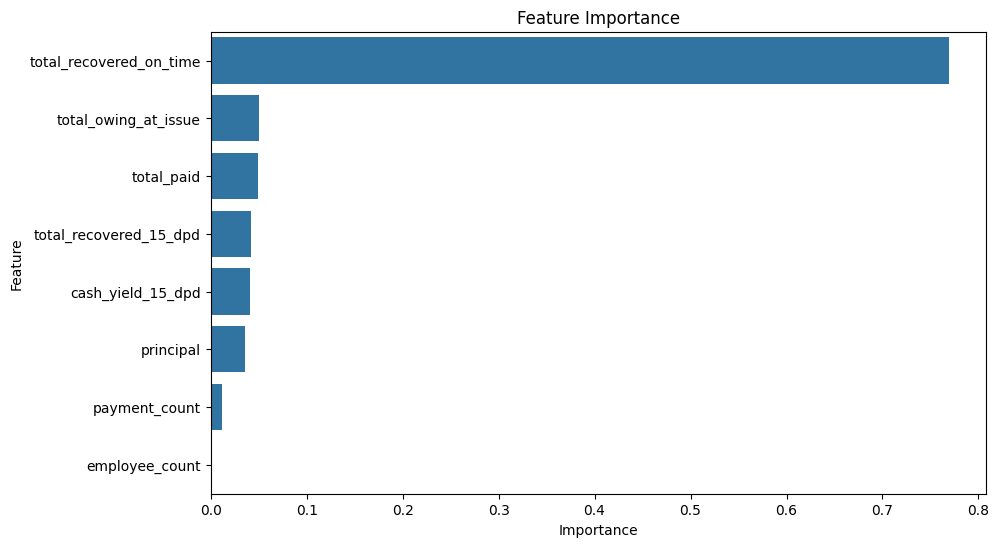

In [ ]:
# Get feature importance
feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


**Training and validating the model (or making predictions) against the 2,000 loans in the test data.**

In [ ]:
test_loan_data

,loan_id,business_id,credit_officer_id,dismissal_description,acquisition_channel,sector,principal,total_owing_at_issue,application_number,applying_for_loan_number,loan_number,employee_count,approval_status,payment_status,paid_late,total_recovered_on_time,total_recovered_15_dpd,cash_yield_15_dpd
0,1003730,604923,131449,NaN,Friend,Beauty Fashion,350000.0,399500.0,3,3,3,1.0,Approved,Paid up,False,399500.0,399500.0,49500.0
1,986527,122438,279289,NaN,Friend,Food Staple Goods,1500000.0,1771000.0,30,27,27,1.0,Approved,Paid up,False,1771000.0,1771000.0,271000.0
2,985254,675619,279290,NaN,Sales Team,Metal and Woodworking,578400.0,648400.0,2,2,2,NaN,Approved,Paid up,False,648400.0,648400.0,70000.0
3,989887,312482,108022,NaN,Friend,Mobile Money Airtime,650000.0,768300.0,20,19,19,1.0,Approved,Written off,True,0.0,0.0,-650000.0
4,994582,654630,137987,NaN,Friend,Hospitality,594000.0,665900.0,3,3,3,NaN,Approved,Paid up,False,665900.0,665900.0,71900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1003722,175272,131449,NaN,Friend,Food Staple Goods,200000.0,224200.0,26,26,26,0.0,Approved,Paid up,False,224200.0,224200.0,24200.0
1996,1001138,68561,131450,NaN,Friend,Phones Electronics,1900000.0,2127200.0,30,30,30,1.0,Approved,Paid up,False,2127200.0,2127200.0,227200.0
1997,1002624,108383,131449,NaN,Friend,Food Staple Goods,1149200.0,1287200.0,13,9,9,1.0,Approved,Paid up,False,1287200.0,1287200.0,138000.0
1998,987346,413103,295227,NaN,Friend,Phones Electronics,880000.0,1003900.0,15,15,15,2.0,Approved,Paid up,False,1003900.0,1003900.0,123900.0


In [ ]:


print(test_loan_data.shape)


(2000, 18)


In [ ]:


print(test_loan_data.dtypes)

loan_id                       int64
business_id                   int64
credit_officer_id             int64
dismissal_description       float64
acquisition_channel          object
sector                       object
principal                   float64
total_owing_at_issue        float64
application_number            int64
applying_for_loan_number      int64
loan_number                   int64
employee_count              float64
approval_status              object
payment_status               object
paid_late                      bool
total_recovered_on_time     float64
total_recovered_15_dpd      float64
cash_yield_15_dpd           float64
dtype: object


In [ ]:
# check missing number of the test data

print(test_loan_data.isnull().sum())


loan_id                        0
business_id                    0
credit_officer_id              0
dismissal_description       2000
acquisition_channel            0
sector                         0
principal                      0
total_owing_at_issue           0
application_number             0
applying_for_loan_number       0
loan_number                    0
employee_count               387
approval_status                0
payment_status                 0
paid_late                      0
total_recovered_on_time        1
total_recovered_15_dpd         1
cash_yield_15_dpd              1
dtype: int64


In [ ]:
# Create a copy of the original DataFrame to avoid modifying it directly
test_loan_data_cleaned = test_loan_data.copy()

# Specify the categorical columns to keep
categorical_columns = ['paid_late']  # Replace with your actual categorical columns

# Remove columns with string data and the 'dismissal_description' column, excluding categorical columns
for column in test_loan_data_cleaned.columns:
    if (test_loan_data_cleaned[column].dtype == object and
        column not in categorical_columns and
        column != 'dismissal_description'):
        test_loan_data_cleaned = test_loan_data_cleaned.drop(column, axis=1)

# Display the cleaned DataFrame
print(test_loan_data_cleaned.head())


   loan_id  business_id  credit_officer_id  dismissal_description  principal  \
0  1003730       604923             131449                    NaN   350000.0   
1   986527       122438             279289                    NaN  1500000.0   
2   985254       675619             279290                    NaN   578400.0   
3   989887       312482             108022                    NaN   650000.0   
4   994582       654630             137987                    NaN   594000.0   

   total_owing_at_issue  application_number  applying_for_loan_number  \
0              399500.0                   3                         3   
1             1771000.0                  30                        27   
2              648400.0                   2                         2   
3              768300.0                  20                        19   
4              665900.0                   3                         3   

   loan_number  employee_count  paid_late  total_recovered_on_time  \
0         

In [ ]:

test_loan_data_cleaned


,loan_id,business_id,credit_officer_id,dismissal_description,principal,total_owing_at_issue,application_number,applying_for_loan_number,loan_number,employee_count,paid_late,total_recovered_on_time,total_recovered_15_dpd,cash_yield_15_dpd
0,1003730,604923,131449,NaN,350000.0,399500.0,3,3,3,1.0,False,399500.0,399500.0,49500.0
1,986527,122438,279289,NaN,1500000.0,1771000.0,30,27,27,1.0,False,1771000.0,1771000.0,271000.0
2,985254,675619,279290,NaN,578400.0,648400.0,2,2,2,NaN,False,648400.0,648400.0,70000.0
3,989887,312482,108022,NaN,650000.0,768300.0,20,19,19,1.0,True,0.0,0.0,-650000.0
4,994582,654630,137987,NaN,594000.0,665900.0,3,3,3,NaN,False,665900.0,665900.0,71900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1003722,175272,131449,NaN,200000.0,224200.0,26,26,26,0.0,False,224200.0,224200.0,24200.0
1996,1001138,68561,131450,NaN,1900000.0,2127200.0,30,30,30,1.0,False,2127200.0,2127200.0,227200.0
1997,1002624,108383,131449,NaN,1149200.0,1287200.0,13,9,9,1.0,False,1287200.0,1287200.0,138000.0
1998,987346,413103,295227,NaN,880000.0,1003900.0,15,15,15,2.0,False,1003900.0,1003900.0,123900.0


In [ ]:
# Create a copy of the original DataFrame to avoid modifying it directly
test_loan_data_cleaned = test_loan_data.copy()

# Specify the categorical columns to keep
categorical_columns = ['paid_late']  # Replace with your actual categorical columns

# Remove 'dismissal_description' column if it exists
if 'dismissal_description' in test_loan_data_cleaned.columns:
    test_loan_data_cleaned = test_loan_data_cleaned.drop('dismissal_description', axis=1)

# Remove columns with string data, excluding categorical columns
for column in test_loan_data_cleaned.columns:
    if (test_loan_data_cleaned[column].dtype == object and
        column not in categorical_columns):
        test_loan_data_cleaned = test_loan_data_cleaned.drop(column, axis=1)

# Display the cleaned DataFrame
print(test_loan_data_cleaned.head())


   loan_id  business_id  credit_officer_id  principal  total_owing_at_issue  \
0  1003730       604923             131449   350000.0              399500.0   
1   986527       122438             279289  1500000.0             1771000.0   
2   985254       675619             279290   578400.0              648400.0   
3   989887       312482             108022   650000.0              768300.0   
4   994582       654630             137987   594000.0              665900.0   

   application_number  applying_for_loan_number  loan_number  employee_count  \
0                   3                         3            3             1.0   
1                  30                        27           27             1.0   
2                   2                         2            2             NaN   
3                  20                        19           19             1.0   
4                   3                         3            3             NaN   

   paid_late  total_recovered_on_time  total

In [ ]:

test_loan_data_cleaned

,loan_id,business_id,credit_officer_id,principal,total_owing_at_issue,application_number,applying_for_loan_number,loan_number,employee_count,paid_late,total_recovered_on_time,total_recovered_15_dpd,cash_yield_15_dpd
0,1003730,604923,131449,350000.0,399500.0,3,3,3,1.0,False,399500.0,399500.0,49500.0
1,986527,122438,279289,1500000.0,1771000.0,30,27,27,1.0,False,1771000.0,1771000.0,271000.0
2,985254,675619,279290,578400.0,648400.0,2,2,2,NaN,False,648400.0,648400.0,70000.0
3,989887,312482,108022,650000.0,768300.0,20,19,19,1.0,True,0.0,0.0,-650000.0
4,994582,654630,137987,594000.0,665900.0,3,3,3,NaN,False,665900.0,665900.0,71900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1003722,175272,131449,200000.0,224200.0,26,26,26,0.0,False,224200.0,224200.0,24200.0
1996,1001138,68561,131450,1900000.0,2127200.0,30,30,30,1.0,False,2127200.0,2127200.0,227200.0
1997,1002624,108383,131449,1149200.0,1287200.0,13,9,9,1.0,False,1287200.0,1287200.0,138000.0
1998,987346,413103,295227,880000.0,1003900.0,15,15,15,2.0,False,1003900.0,1003900.0,123900.0


In [ ]:
# dimmension

print(test_loan_data_cleaned.shape)


(2000, 13)


In [ ]:
#  datatypes

print(test_loan_data_cleaned.dtypes)


loan_id                       int64
business_id                   int64
credit_officer_id             int64
principal                   float64
total_owing_at_issue        float64
application_number            int64
applying_for_loan_number      int64
loan_number                   int64
employee_count              float64
paid_late                      bool
total_recovered_on_time     float64
total_recovered_15_dpd      float64
cash_yield_15_dpd           float64
dtype: object


In [ ]:
#check for missing number

print(test_loan_data_cleaned.isnull().sum())


loan_id                       0
business_id                   0
credit_officer_id             0
principal                     0
total_owing_at_issue          0
application_number            0
applying_for_loan_number      0
loan_number                   0
employee_count              387
paid_late                     0
total_recovered_on_time       1
total_recovered_15_dpd        1
cash_yield_15_dpd             1
dtype: int64


In [ ]:
# place the missing number

# Replace missing values in test_loan_data_cleaned with the mean
for column in test_loan_data_cleaned.columns:
    if test_loan_data_cleaned[column].isnull().any():
        test_loan_data_cleaned[column].fillna(test_loan_data_cleaned[column].mean(), inplace=True)

print(test_loan_data_cleaned.isnull().sum())


loan_id                     0
business_id                 0
credit_officer_id           0
principal                   0
total_owing_at_issue        0
application_number          0
applying_for_loan_number    0
loan_number                 0
employee_count              0
paid_late                   0
total_recovered_on_time     0
total_recovered_15_dpd      0
cash_yield_15_dpd           0
dtype: int64


<ipython-input-58-ff9681571c07>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_loan_data_cleaned[column].fillna(test_loan_data_cleaned[column].mean(), inplace=True)


In [ ]:
test_loan_data_cleaned

,loan_id,business_id,credit_officer_id,principal,total_owing_at_issue,application_number,applying_for_loan_number,loan_number,employee_count,paid_late,total_recovered_on_time,total_recovered_15_dpd,cash_yield_15_dpd
0,1003730,604923,131449,350000.0,399500.0,3,3,3,1.00000,False,399500.0,399500.0,49500.0
1,986527,122438,279289,1500000.0,1771000.0,30,27,27,1.00000,False,1771000.0,1771000.0,271000.0
2,985254,675619,279290,578400.0,648400.0,2,2,2,12464.50155,False,648400.0,648400.0,70000.0
3,989887,312482,108022,650000.0,768300.0,20,19,19,1.00000,True,0.0,0.0,-650000.0
4,994582,654630,137987,594000.0,665900.0,3,3,3,12464.50155,False,665900.0,665900.0,71900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1003722,175272,131449,200000.0,224200.0,26,26,26,0.00000,False,224200.0,224200.0,24200.0
1996,1001138,68561,131450,1900000.0,2127200.0,30,30,30,1.00000,False,2127200.0,2127200.0,227200.0
1997,1002624,108383,131449,1149200.0,1287200.0,13,9,9,1.00000,False,1287200.0,1287200.0,138000.0
1998,987346,413103,295227,880000.0,1003900.0,15,15,15,2.00000,False,1003900.0,1003900.0,123900.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assume train_loan_data_cleaned is your DataFrame containing the 'paid_late' column
label_encoder = LabelEncoder()
test_loan_data_cleaned['paid_late'] = label_encoder.fit_transform(test_loan_data_cleaned['paid_late'])


In [ ]:
test_loan_data_cleaned

,loan_id,business_id,credit_officer_id,principal,total_owing_at_issue,application_number,applying_for_loan_number,loan_number,employee_count,paid_late,total_recovered_on_time,total_recovered_15_dpd,cash_yield_15_dpd
0,1003730,604923,131449,350000.0,399500.0,3,3,3,1.00000,0,399500.0,399500.0,49500.0
1,986527,122438,279289,1500000.0,1771000.0,30,27,27,1.00000,0,1771000.0,1771000.0,271000.0
2,985254,675619,279290,578400.0,648400.0,2,2,2,12464.50155,0,648400.0,648400.0,70000.0
3,989887,312482,108022,650000.0,768300.0,20,19,19,1.00000,1,0.0,0.0,-650000.0
4,994582,654630,137987,594000.0,665900.0,3,3,3,12464.50155,0,665900.0,665900.0,71900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1003722,175272,131449,200000.0,224200.0,26,26,26,0.00000,0,224200.0,224200.0,24200.0
1996,1001138,68561,131450,1900000.0,2127200.0,30,30,30,1.00000,0,2127200.0,2127200.0,227200.0
1997,1002624,108383,131449,1149200.0,1287200.0,13,9,9,1.00000,0,1287200.0,1287200.0,138000.0
1998,987346,413103,295227,880000.0,1003900.0,15,15,15,2.00000,0,1003900.0,1003900.0,123900.0


In [ ]:


test_loan_data_cleaned.to_csv('test_loan_data_cleaned.csv', index=False)


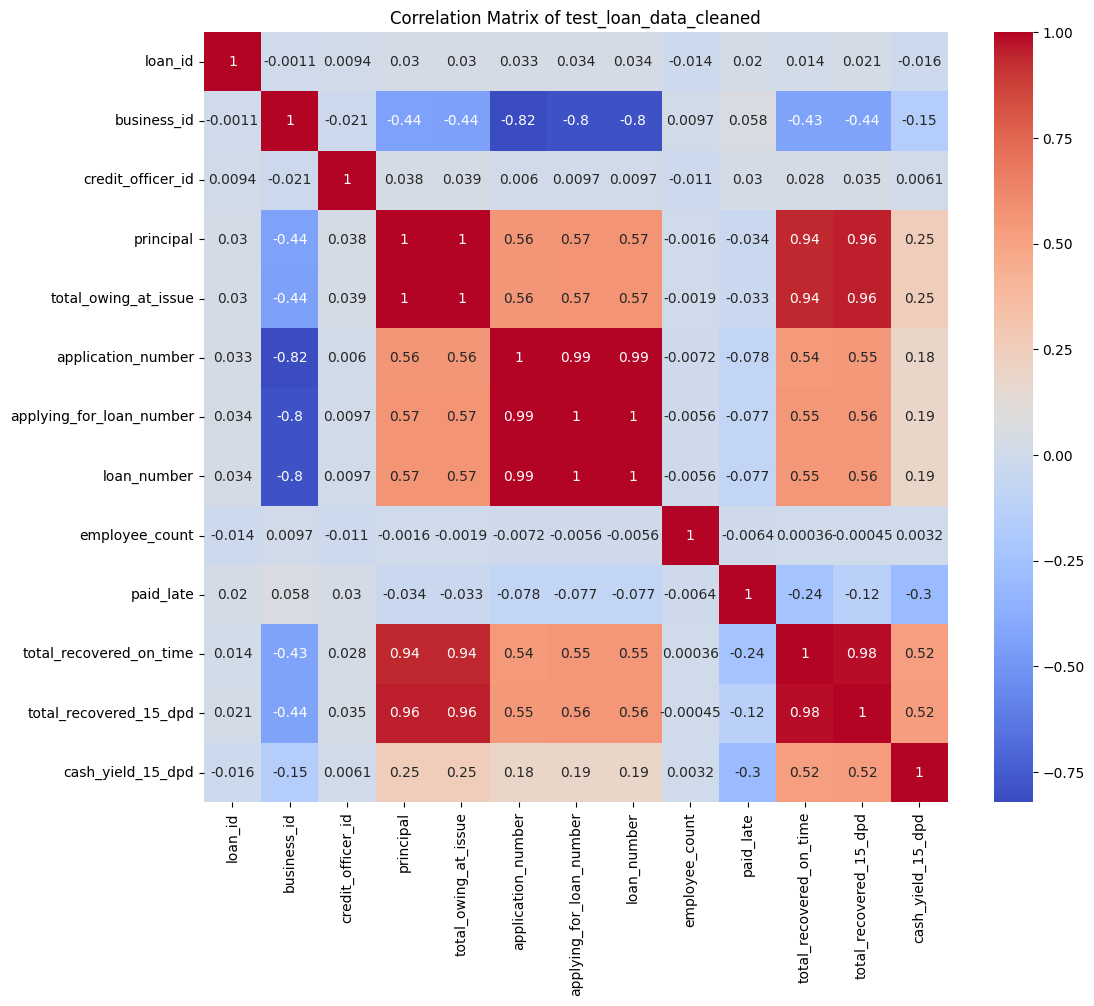

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(test_loan_data_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of test_loan_data_cleaned')
plt.show()

In [ ]:

import pandas as pd
test_loan_data_cleaned = pd.read_csv('test_loan_data_cleaned.csv')
print(test_loan_data_cleaned.shape)


(2000, 13)


**Merge the test data to Payment data**

In [ ]:
import pandas as pd

# Load datasets
test_loan_data_cleaned = pd.read_csv('test_loan_data_cleaned.csv')
train_payment_data_cleaned = pd.read_csv('train_payment_data_cleaned.csv')

# Aggregate payment data if necessary (e.g., sum of payments per loan_id)
payment_agg = train_payment_data_cleaned.groupby('loan_id').agg({
    'amount': ['sum', 'count']  # Sum of total payments and count of payments
}).reset_index()

# Rename columns after aggregation
payment_agg.columns = ['loan_id', 'total_paid', 'payment_count']

# Merge the aggregated payment data with the loan data on loan_id
merged_data1 = pd.merge(test_loan_data_cleaned, payment_agg, on='loan_id', how='left')

# Fill missing values (if a loan_id has no payment records, we fill with 0)
merged_data1.fillna(0, inplace=True)

# Inspect the merged data
print(merged_data1.head())

# After this, you can use merged_data for further preprocessing (like encoding, scaling, etc.) before applying it to a machine learning model

   loan_id  business_id  credit_officer_id  principal  total_owing_at_issue  \
0  1003730       604923             131449   350000.0              399500.0   
1   986527       122438             279289  1500000.0             1771000.0   
2   985254       675619             279290   578400.0              648400.0   
3   989887       312482             108022   650000.0              768300.0   
4   994582       654630             137987   594000.0              665900.0   

   application_number  applying_for_loan_number  loan_number  employee_count  \
0                   3                         3            3         1.00000   
1                  30                        27           27         1.00000   
2                   2                         2            2     12464.50155   
3                  20                        19           19         1.00000   
4                   3                         3            3     12464.50155   

   paid_late  total_recovered_on_time  total

In [ ]:
merged_data1

,loan_id,business_id,credit_officer_id,principal,total_owing_at_issue,application_number,applying_for_loan_number,loan_number,employee_count,paid_late,total_recovered_on_time,total_recovered_15_dpd,cash_yield_15_dpd,total_paid,payment_count
0,1003730,604923,131449,350000.0,399500.0,3,3,3,1.00000,0,399500.0,399500.0,49500.0,0.0,0.0
1,986527,122438,279289,1500000.0,1771000.0,30,27,27,1.00000,0,1771000.0,1771000.0,271000.0,0.0,0.0
2,985254,675619,279290,578400.0,648400.0,2,2,2,12464.50155,0,648400.0,648400.0,70000.0,0.0,0.0
3,989887,312482,108022,650000.0,768300.0,20,19,19,1.00000,1,0.0,0.0,-650000.0,0.0,0.0
4,994582,654630,137987,594000.0,665900.0,3,3,3,12464.50155,0,665900.0,665900.0,71900.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1003722,175272,131449,200000.0,224200.0,26,26,26,0.00000,0,224200.0,224200.0,24200.0,0.0,0.0
1996,1001138,68561,131450,1900000.0,2127200.0,30,30,30,1.00000,0,2127200.0,2127200.0,227200.0,0.0,0.0
1997,1002624,108383,131449,1149200.0,1287200.0,13,9,9,1.00000,0,1287200.0,1287200.0,138000.0,0.0,0.0
1998,987346,413103,295227,880000.0,1003900.0,15,15,15,2.00000,0,1003900.0,1003900.0,123900.0,0.0,0.0


In [ ]:

print("Dimensions of merged_data1:")
print(merged_data1.shape)


Dimensions of merged_data1:
(2000, 15)


In [ ]:
merged_data1.to_csv('merged_data1.csv', index=False)

In [ ]:
import pandas as pd

# Load your dataset (assuming it has already been cleaned and merged)
df = pd.read_csv('merged_data1.csv')

# List of columns to drop
columns_to_remove = ['loan_id', 'business_id', 'credit_officer_id', 'application_number',
                     'applying_for_loan_number', 'loan_number']

# Drop the unnecessary columns
df_cleaned1 = df.drop(columns=columns_to_remove)

# Preview the cleaned dataset
print(df_cleaned1.head())

# Check for any missing values (Optional)
print(df_cleaned1.isnull().sum())

# Optionally, fill missing values (if necessary)
df_cleaned1.fillna(0, inplace=True)

# Final cleaned dataset ready for further analysis or model preparation
print(df_cleaned1.shape)

   principal  total_owing_at_issue  employee_count  paid_late  \
0   350000.0              399500.0         1.00000          0   
1  1500000.0             1771000.0         1.00000          0   
2   578400.0              648400.0     12464.50155          0   
3   650000.0              768300.0         1.00000          1   
4   594000.0              665900.0     12464.50155          0   

   total_recovered_on_time  total_recovered_15_dpd  cash_yield_15_dpd  \
0                 399500.0                399500.0            49500.0   
1                1771000.0               1771000.0           271000.0   
2                 648400.0                648400.0            70000.0   
3                      0.0                     0.0          -650000.0   
4                 665900.0                665900.0            71900.0   

   total_paid  payment_count  
0         0.0            0.0  
1         0.0            0.0  
2         0.0            0.0  
3         0.0            0.0  
4         0.0  

In [ ]:
df_cleaned1

,principal,total_owing_at_issue,employee_count,paid_late,total_recovered_on_time,total_recovered_15_dpd,cash_yield_15_dpd,total_paid,payment_count
0,350000.0,399500.0,1.00000,0,399500.0,399500.0,49500.0,0.0,0.0
1,1500000.0,1771000.0,1.00000,0,1771000.0,1771000.0,271000.0,0.0,0.0
2,578400.0,648400.0,12464.50155,0,648400.0,648400.0,70000.0,0.0,0.0
3,650000.0,768300.0,1.00000,1,0.0,0.0,-650000.0,0.0,0.0
4,594000.0,665900.0,12464.50155,0,665900.0,665900.0,71900.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1995,200000.0,224200.0,0.00000,0,224200.0,224200.0,24200.0,0.0,0.0
1996,1900000.0,2127200.0,1.00000,0,2127200.0,2127200.0,227200.0,0.0,0.0
1997,1149200.0,1287200.0,1.00000,0,1287200.0,1287200.0,138000.0,0.0,0.0
1998,880000.0,1003900.0,2.00000,0,1003900.0,1003900.0,123900.0,0.0,0.0


In [ ]:


print(df_cleaned1.shape)

(2000, 9)


In [ ]:
# Save df_cleaned1 to a CSV file
df_cleaned1.to_csv('data_for_ml1.csv', index=False)


***Normalization***

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the cleaned data
df_cleaned = pd.read_csv('data_for_ml1.csv')

# Separate features and target
X = df_cleaned.drop(columns=['paid_late'])  # Features
y = df_cleaned['paid_late']  # Target

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the feature data
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add the target variable back to the scaled DataFrame
df_normalized1 = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

# Save the normalized data to CSV
df_normalized1.to_csv('normalized_data_for_ml1.csv', index=False)

print("Normalized data saved to 'normalized_data_for_ml1.csv'")

Normalized data saved to 'normalized_data_for_ml1.csv'


In [ ]:
# Import necessary libraries
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Load the trained model
model = joblib.load('loan_default_prediction_model.pkl')

# Load the test data (already normalized)
test_data = pd.read_csv('normalized_data_for_ml1.csv')

# Separate features and target (assuming 'paid_late' is the target)
X_test = test_data.drop(columns=['paid_late'])  # Features
y_test = test_data['paid_late']  # True labels

# Make predictions using the loaded model
predictions = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)
auc_score = roc_auc_score(y_test, predictions)

# Print evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"AUC Score: {auc_score:.2f}")

# Add predictions to the test data for future analysis or evaluation
test_data['predicted_paid_late'] = predictions

# Save the predictions to a new CSV file
test_data.to_csv('test_loan_predictions.csv', index=False)

print("Predictions saved to 'test_loan_predictions.csv'")


Accuracy: 93.25%
Confusion Matrix:
[[1733   95]
 [  40  132]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1828
           1       0.58      0.77      0.66       172

    accuracy                           0.93      2000
   macro avg       0.78      0.86      0.81      2000
weighted avg       0.94      0.93      0.94      2000

AUC Score: 0.86
Predictions saved to 'test_loan_predictions.csv'


In [ ]:
# Import necessary libraries
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import ConvergenceWarning
import warnings

# Load the test data (already normalized)
test_data = pd.read_csv('normalized_data_for_ml1.csv')

# Separate features and target (assuming 'paid_late' is the target)
X_test = test_data.drop(columns=['paid_late'])  # Features
y_test = test_data['paid_late']  # True labels

# Load the trained model
try:
    model = joblib.load('loan_default_prediction_model.pkl')
except FileNotFoundError:
    print("Trained model not found. Training a new model instead.")
    # If the model isn't found, let's retrain it
    success = False
    max_retries = 5
    retries = 0

    # Load training data (assuming it's in the same format as test data)
    train_data = pd.read_csv('normalized_data_for_ml.csv')
    X_train = train_data.drop(columns=['paid_late'])  # Features
    y_train = train_data['paid_late']  # Target

    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Suppress convergence warnings for demonstration purposes
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

    # Retry training in a loop with hyperparameter adjustment
    while not success and retries < max_retries:
        try:
            model.fit(X_train, y_train)
            success = True
        except ConvergenceWarning:
            print("Convergence warning encountered. Adjusting hyperparameters...")
            model.set_params(n_estimators=model.n_estimators + 50)  # Example hyperparameter adjustment
            retries += 1

        # Check for overfitting using training vs. test accuracy (using cross-validation may be better)
        train_accuracy = model.score(X_train, y_train)
        test_accuracy = model.score(X_test, y_test)

        if train_accuracy > 0.99 and test_accuracy < 0.7:
            print("Overfitting detected. Stopping training.")
            break

    # Save the newly trained model to file
    if success:
        joblib.dump(model, 'loan_default_prediction_model.pkl')
        print("Model trained and saved successfully.")
    else:
        print("Training was not successful after multiple attempts.")
        exit(1)

# If the model is already trained or successfully trained, proceed to prediction
predictions = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)
auc_score = roc_auc_score(y_test, predictions)

# Print evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"AUC Score: {auc_score:.2f}")

# Add predictions to the test data for future analysis or evaluation
test_data['predicted_paid_late'] = predictions

# Save the predictions to a new CSV file
test_data.to_csv('test_loan_predictions.csv1', index=False)

print("Predictions saved to 'test_loan_predictions.csv1")


Accuracy: 93.25%
Confusion Matrix:
[[1733   95]
 [  40  132]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1828
           1       0.58      0.77      0.66       172

    accuracy                           0.93      2000
   macro avg       0.78      0.86      0.81      2000
weighted avg       0.94      0.93      0.94      2000

AUC Score: 0.86
Predictions saved to 'test_loan_predictions.csv1



- The code first tries to load a pre-trained model (loan_default_prediction_model.pkl). If the model is not found, it retrains the model using a loop similar to your provided structure.
Retry Logic for Training:

- The model training is wrapped in a loop that retries up to max_retries times if a ConvergenceWarning occurs. Each retry increases the number of trees (n_estimators) in the RandomForestClassifier by 50.
Overfitting Check:

- After each training attempt, the code checks if the model is overfitting by comparing training accuracy to test accuracy (a simple heuristic). If overfitting is detected, the training stops.
Prediction:

- If the model is successfully trained or loaded, it proceeds to make predictions on the test set and evaluates the model’s performance.


In [ ]:
# Create a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({
    'Actual Paid Late': y_test,
    'Predicted Paid Late': test_data['predicted_paid_late']
})

# Display the comparison table
print(comparison_df.head(10))  # Display the first 10 rows for brevity

# Optionally, save the comparison to a CSV file for further analysis
comparison_df.to_csv('paid_late_comparison.csv', index=False)
print("Comparison saved to 'paid_late_comparison.csv'")


   Actual Paid Late  Predicted Paid Late
0                 0                    0
1                 0                    0
2                 0                    0
3                 1                    1
4                 0                    0
5                 0                    0
6                 0                    0
7                 0                    0
8                 0                    0
9                 0                    0
Comparison saved to 'paid_late_comparison.csv'


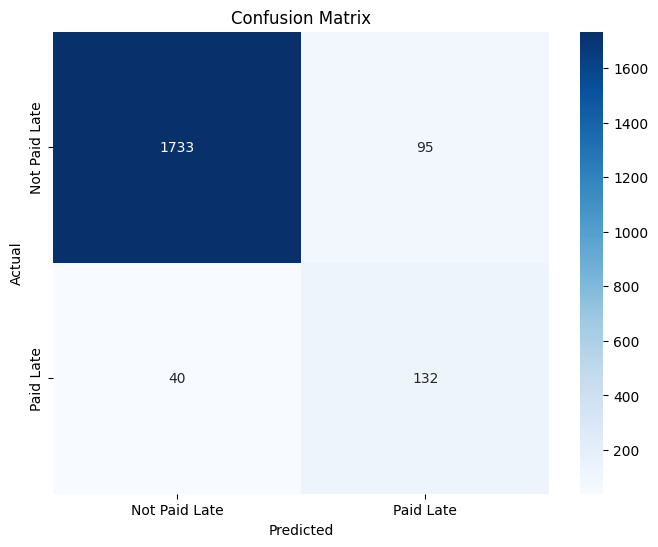

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Paid Late', 'Paid Late'],
            yticklabels=['Not Paid Late', 'Paid Late'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


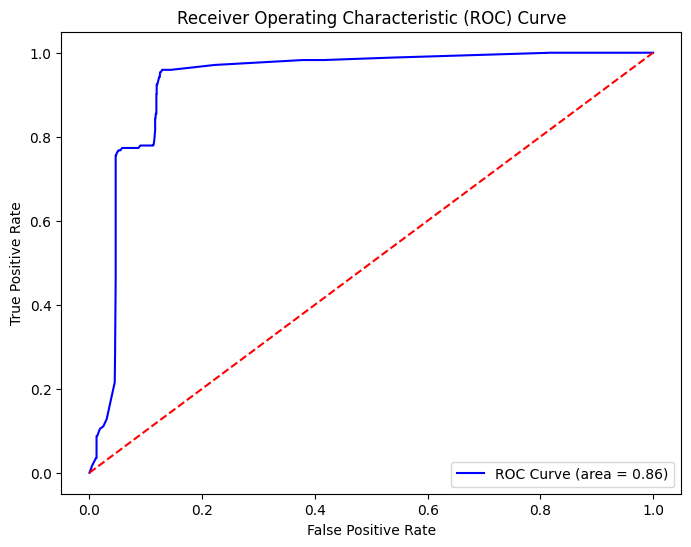

In [ ]:
from sklearn.metrics import roc_curve

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


<ipython-input-79-427ec2ae249e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: Wh

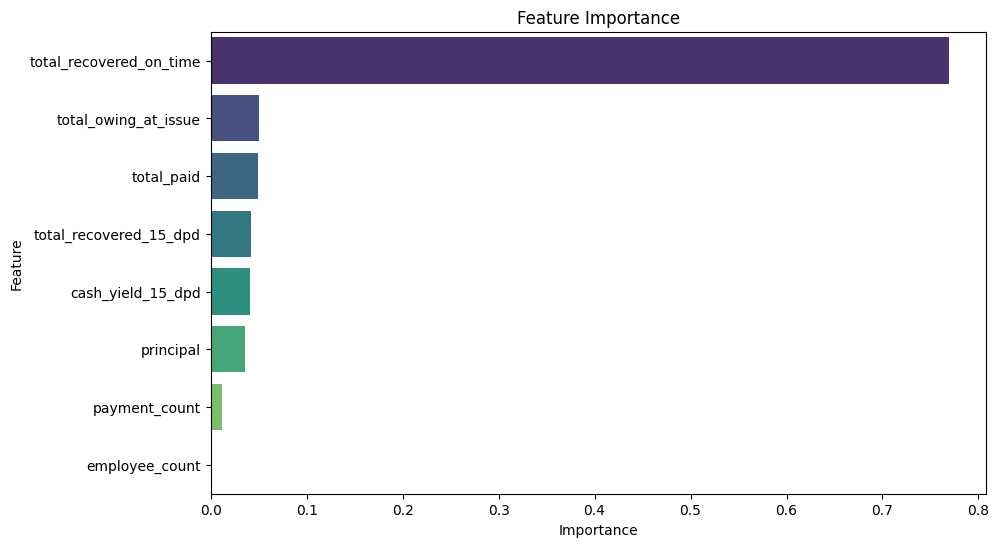

In [ ]:
# Assuming the model has a feature_importances_ attribute (like tree-based models)
if hasattr(model, 'feature_importances_'):
    feature_importances = model.feature_importances_
    features = X_test.columns

    # Create a DataFrame for feature importance
    feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
    plt.title('Feature Importance')
    plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


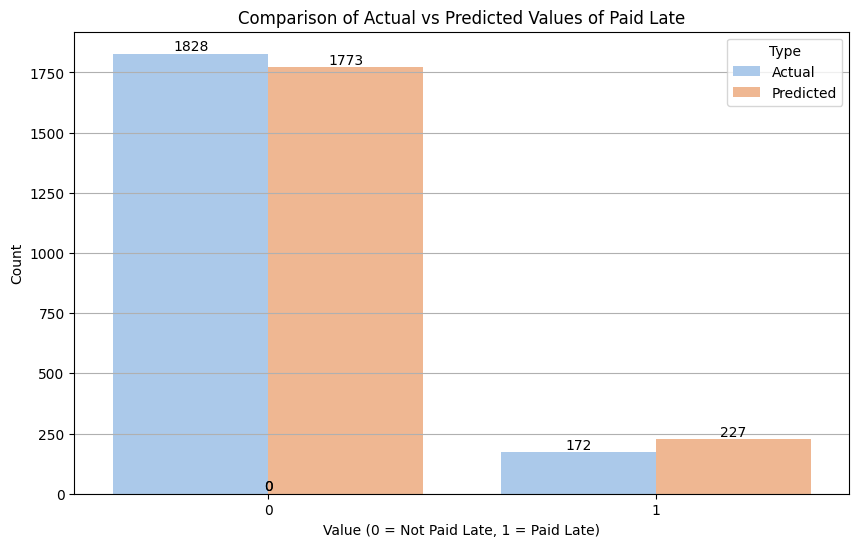

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to count occurrences of true vs predicted values
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': test_data['predicted_paid_late']
})

# Melt the DataFrame for easier plotting
comparison_melted = comparison.melt(var_name='Type', value_name='Value')

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=comparison_melted, x='Value', hue='Type', palette='pastel')

# Annotate with count values
for p in ax.patches:
    height = p.get_height()
    count = int(height)  # Get the count value directly from the height
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.title('Comparison of Actual vs Predicted Values of Paid Late')
plt.xlabel('Value (0 = Not Paid Late, 1 = Paid Late)')
plt.ylabel('Count')
plt.legend(title='Type', labels=['Actual', 'Predicted'])
plt.grid(axis='y')
plt.show()



Actual Percentage of People who Paid Late: 8.60%
Actual Percentage of People who Paid on Time: 91.40%
Predicted Percentage of People who Paid Late: 11.35%
Predicted Percentage of People who Paid on Time: 88.65%


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


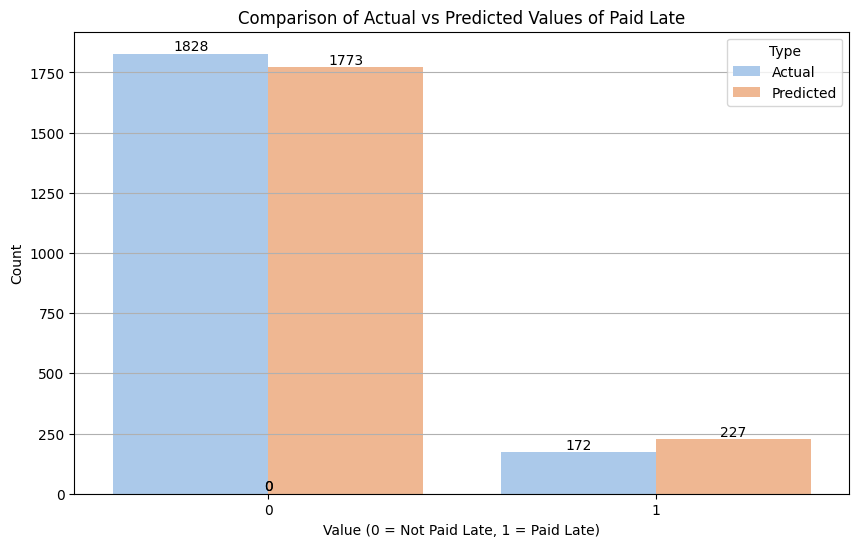

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to count occurrences of true vs predicted values
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': test_data['predicted_paid_late']
})

# Calculate the count of each category for both actual and predicted
actual_counts = comparison['Actual'].value_counts()
predicted_counts = comparison['Predicted'].value_counts()

# Calculate the percentages for actual values
actual_paid_late_percentage = (actual_counts[1] / actual_counts.sum()) * 100
actual_not_paid_late_percentage = (actual_counts[0] / actual_counts.sum()) * 100

# Calculate the percentages for predicted values
predicted_paid_late_percentage = (predicted_counts[1] / predicted_counts.sum()) * 100
predicted_not_paid_late_percentage = (predicted_counts[0] / predicted_counts.sum()) * 100

# Print out the percentages
print(f"Actual Percentage of People who Paid Late: {actual_paid_late_percentage:.2f}%")
print(f"Actual Percentage of People who Paid on Time: {actual_not_paid_late_percentage:.2f}%")
print(f"Predicted Percentage of People who Paid Late: {predicted_paid_late_percentage:.2f}%")
print(f"Predicted Percentage of People who Paid on Time: {predicted_not_paid_late_percentage:.2f}%")

# Melt the DataFrame for easier plotting
comparison_melted = comparison.melt(var_name='Type', value_name='Value')

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=comparison_melted, x='Value', hue='Type', palette='pastel')

# Annotate with count values
for p in ax.patches:
    height = p.get_height()
    count = int(height)  # Get the count value directly from the height
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.title('Comparison of Actual vs Predicted Values of Paid Late')
plt.xlabel('Value (0 = Not Paid Late, 1 = Paid Late)')
plt.ylabel('Count')
plt.legend(title='Type', labels=['Actual', 'Predicted'])
plt.grid(axis='y')
plt.show()


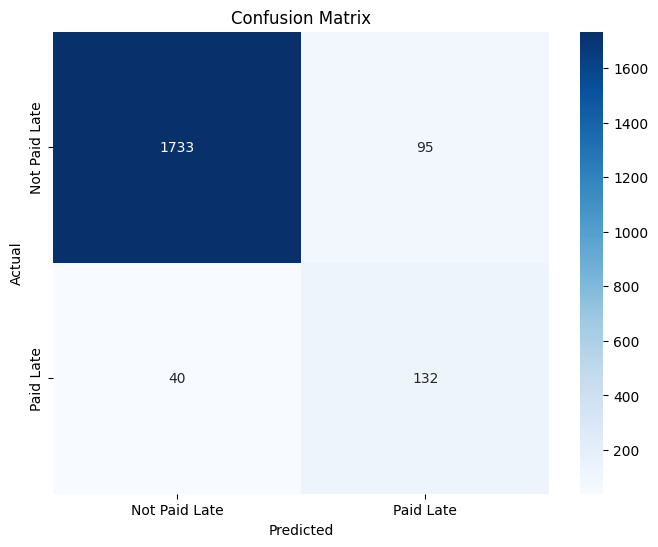

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, test_data['predicted_paid_late'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Paid Late', 'Paid Late'],
            yticklabels=['Not Paid Late', 'Paid Late'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




# Assuming 'conf_matrix' is the confusion matrix from your model evaluation

# Explanation of the confusion matrix plot:

# - **True Positives (TP):** The number of instances correctly predicted as 'Paid Late'.
#   - Located in the bottom-right cell of the matrix.
# - **True Negatives (TN):** The number of instances correctly predicted as 'Not Paid Late'.
#   - Located in the top-left cell of the matrix.
# - **False Positives (FP):** The number of instances incorrectly predicted as 'Paid Late' (Type I error).
#   - Also known as a "false alarm".
#   - Located in the top-right cell of the matrix.
# - **False Negatives (FN):** The number of instances incorrectly predicted as 'Not Paid Late' (Type II error).
#   - Also known as a "missed detection".
#   - Located in the bottom-left cell of the matrix.

# The plot helps visualize the performance of a classification model by showing how many
# predictions were correct and incorrect for each class (Paid Late and Not Paid Late).
# It is useful to understand the types of errors the model is making.

# Example interpretation:
# If the top-left cell (TN) has a high value, it means the model accurately predicts
# "Not Paid Late" cases. If the bottom-right cell (TP) has a high value, it means
# the model accurately predicts "Paid Late" cases.
# However, if the top-right cell (FP) or bottom-left cell (FN) have high values,
# it indicates that the model is making a significant number of errors, and the model's
# accuracy might need improvement.

# The 'heatmap' visualization with annotations makes the numbers more easily understandable.
# The color intensity indicates the magnitude of the values in the cells.


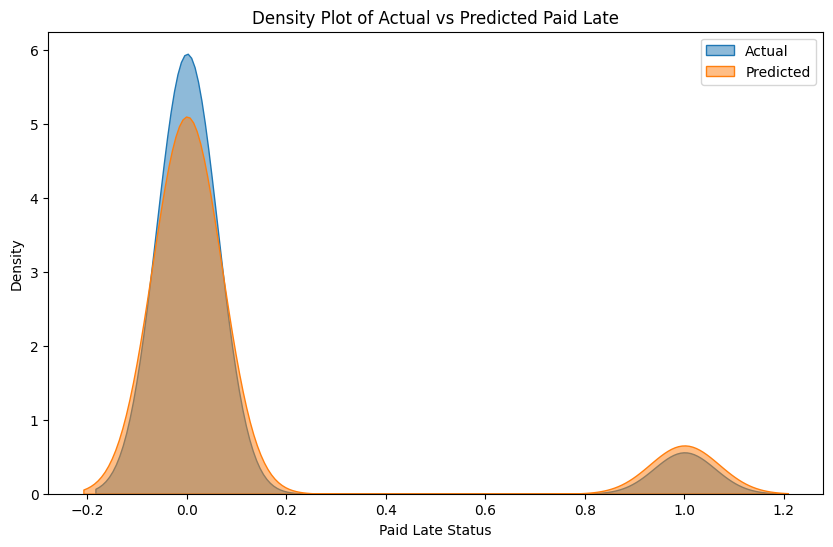

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=comparison, x='Actual', fill=True, label='Actual', alpha=0.5)
sns.kdeplot(data=comparison, x='Predicted', fill=True, label='Predicted', alpha=0.5)
plt.title('Density Plot of Actual vs Predicted Paid Late')
plt.xlabel('Paid Late Status')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
pip install matplotlib seaborn


In [ ]:
import pandas as pd

# Assuming y_test contains actual values and predictions contains predicted values
# Here we load the actual values and predicted values into a DataFrame
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': test_data['predicted_paid_late']
})

# Calculate percentage error
# To avoid division by zero, we will add a small value (e.g., 1e-9) to the actual values
comparison['Percentage Error'] = ((comparison['Predicted'] - comparison['Actual']) / (comparison['Actual'] + 1e-9)) * 100

# Display the results
print(comparison[['Actual', 'Predicted', 'Percentage Error']])


      Actual  Predicted  Percentage Error
0          0          0      0.000000e+00
1          0          0      0.000000e+00
2          0          0      0.000000e+00
3          1          1      0.000000e+00
4          0          0      0.000000e+00
...      ...        ...               ...
1995       0          0      0.000000e+00
1996       0          0      0.000000e+00
1997       0          0      0.000000e+00
1998       0          0      0.000000e+00
1999       0          1      1.000000e+11

[2000 rows x 3 columns]


**Actual,Predicted,Percentage Error table**

In [ ]:
import pandas as pd

# Assuming y_test contains actual values and predictions contains predicted values
# Here we load the actual values and predicted values into a DataFrame
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': test_data['predicted_paid_late']
})

# Calculate percentage error
# To avoid division by zero, we will add a small value (e.g., 1e-9) to the actual values
comparison['Percentage Error'] = ((comparison['Predicted'] - comparison['Actual']) / (comparison['Actual'] + 1e-9)) * 100

# Save the DataFrame to a CSV file
comparison.to_csv('predictions_comparison.csv', index=False)

# Confirm that the file has been saved
print("Comparison saved to 'predictions_comparison.csv'.")


Comparison saved to 'predictions_comparison.csv'.



# It's generally expected that the performance on the test data  will be slightly lower than the performance on the training or validation data.

why:

# * Overfitting: The model might have learned the training data too
well, including its noise and random variations. This can lead to
lower accuracy when applied to new, unseen data.
# * Generalization: The goal is for the model to generalize well to
new data, not just memorize the training data. Test data helps us
assess how well the model can generalize.


# In the context of our work, we've already trained and evaluated the
 model using cross-validation and also on a validation set. The
 performance you see on the test data is a more realistic measure of
how the model will perform in the real world when we deploy it to
 make predictions on new loan data.

# If the test performance is significantly worse than the training
or validation performance, it could indicate that the model is
overfitting. You might need to consider strategies like:

# * Reducing model complexity (e.g., using a simpler model or fewer
features)
# * Regularization techniques (e.g., L1 or L2 regularization)
# * Increasing training data size
# * Hyperparameter tuning (e.g., using grid search or random search)

# However, keep in mind that a slight drop in accuracy on the test
 data compared to the training data is usually acceptable and
expected.